In [121]:
import os
import pandas as pd

In [122]:
results = pd.read_json(os.path.join('data','ergast-results.json'))
wikidata_ids = pd.read_csv(os.path.join('data','wikidata_ids.csv'))
wikid = pd.read_json(os.path.join('data','wikidata.json'))
causes_of_death = pd.read_json(os.path.join('data','causes_of_death.json'))

In [123]:
causes_of_death

,wikidata_id,cause_of_death_mistral,cause_of_death_full
0,Q10490,gp,\#gp died in an race car accident during an F1...
1,Q113327,natural,"""#natural""\nMaglioli died in Monza in 1999, an..."
2,Q113496,otherracing,"""#otherracing died in a race car that was not ..."
3,Q115666,natural,"""#natural""\nHeini Walter died of natural cause..."
4,Q115677,unknown,"""#unknown the cause of death is unknown or can..."
...,...,...,...
328,Q173073,natural,"""#natural Holland died from complications of A..."
329,Q173076,otherracing,\#otherracing\nAyulo died in a race car accide...
330,Q173078,otherracing,"""#otherracing died in a race car that was not ..."
331,Q173081,otherracing,\#otherracing\nBruce McLaren died in a race ca...


In [124]:
results = results.merge(wikidata_ids, left_on="driverUrl", right_on="driverUrl", how="outer")

In [125]:
results = results.merge(causes_of_death, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [126]:
results = results.merge(wikid, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [127]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'wikidata_id', 'cause_of_death_mistral', 'cause_of_death_full',
       'full_name', 'bio', 'gender', 'date_of_birth', 'place_of_birth',
       'date_of_death', 'place_of_death', 'cause_of_death', 'manner_of_death'],
      dtype='object')

In [128]:
results['date_of_birth'] = pd.to_datetime(results['date_of_birth'])
results['date_of_death'] = pd.to_datetime(results['date_of_death'])

In [129]:
results['date'] = pd.to_datetime(results['date'])

In [130]:
living = results[results['date_of_death'].apply(lambda x: "-" not in str(x))]['full_name'].drop_duplicates().to_list()
len(living)

350

In [131]:
results[results['full_name'].isin(living)].sort_values(by='date_of_birth')[['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().head(20)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
10877,Paul Goldsmith,1925-10-02,NaT,None,None
8956,Hermano da Silva Ramos,1925-12-07,NaT,None,None
18189,John Rhodes,1927-08-18,NaT,None,None
21621,Hans Herrmann,1928-02-23,NaT,None,None
12692,André Milhoux,1928-12-09,NaT,None,None
11273,Bernie Ecclestone,1930-10-28,NaT,None,None
10514,David Piper,1930-12-02,NaT,None,None
12673,Fred Gamble,1932-03-17,NaT,None,None
10341,Alex Soler-Roig,1932-10-29,NaT,None,None
12704,Gaetano Starrabba,1932-12-03,NaT,None,None


In [132]:
dead = results[results['date_of_death'].notnull()]['full_name'].drop_duplicates().to_list()
len(dead)

509

In [133]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_birth',ascending=False).head(50)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death,cause_of_death_mistral
19366,Jules Bianchi,1989-08-03,2015-07-17,diffuse axonal injury,accidental death,NaN
7849,Justin Wilson,1978-07-31,2015-08-24,None,None,otherracing
23010,Roland Ratzenberger,1960-07-04,1994-04-30,basilar skull fracture,accidental death,NaN
5592,Adrián Campos,1960-06-17,2021-01-27,None,None,natural
2,Ayrton Senna,1960-03-21,1994-05-01,traumatic brain injury,accidental death,gp
15925,Andrea de Cesaris,1959-05-31,2014-10-05,motorcycle accident,accidental death,NaN
16953,Riccardo Paletti,1958-06-15,1982-06-13,None,None,NaN
8559,"John Crichton-Stuart, 7th Marquess of Bute",1958-04-26,2021-03-22,None,None,natural
15536,Elio de Angelis,1958-03-26,1986-05-15,smoke inhalation injury,None,NaN
20943,Stefan Bellof,1957-11-20,1985-09-01,None,None,NaN


In [134]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().dropna(subset=['date_of_death']).sort_values(by='date_of_death',ascending=False)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
17531,Wilson Fittipaldi Júnior,1943-12-25,2024-02-23,cardiac arrest,natural causes
20699,Alberto Colombo,1946-02-23,2024-01-07,None,None
12700,Basil van Rooyen,1939-04-19,2023-09-14,None,None
10405,Kenneth McAlpine,1920-09-21,2023-04-08,None,None
10435,Slim Borgudd,1946-11-25,2023-02-23,None,None
...,...,...,...,...,...
10510,Cecil Green,1919-09-30,1951-07-29,None,None
18236,Bill Mackey,1927-12-15,1951-07-29,None,None
10879,Walt Brown,1911-12-30,1951-07-29,None,None
9062,Raymond Sommer,1906-08-31,1950-09-10,None,None


In [135]:
results.groupby('date_of_death')['name'].nunique().nlargest(10)

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
1975-11-29    2
1987-02-10    2
2014-05-04    2
1950-07-29    1
1950-09-10    1
Name: name, dtype: int64

In [136]:
results['life_remaining'] = results['date_of_death'] - results['date']

In [137]:
results.groupby('year')['life_remaining'].mean().nsmallest()

year
2014.0              389 days 12:48:00
2013.0    719 days 08:50:31.578947368
1994.0             3658 days 08:00:00
1993.0   3675 days 18:15:39.130434752
1992.0             4000 days 22:00:00
Name: life_remaining, dtype: timedelta64[ns]

<Axes: xlabel='year'>

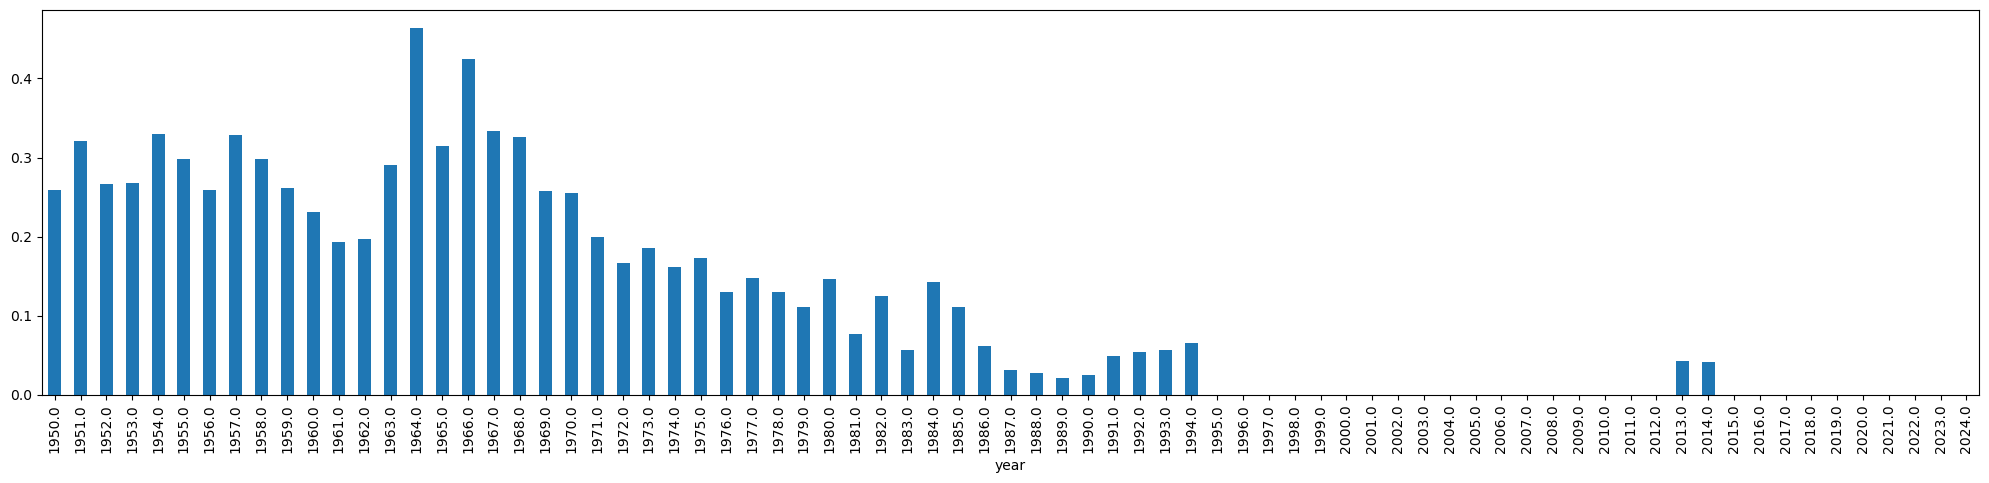

In [138]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [139]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).nlargest(1)

year
1964.0    0.463415
Name: name, dtype: float64

<Axes: xlabel='year'>

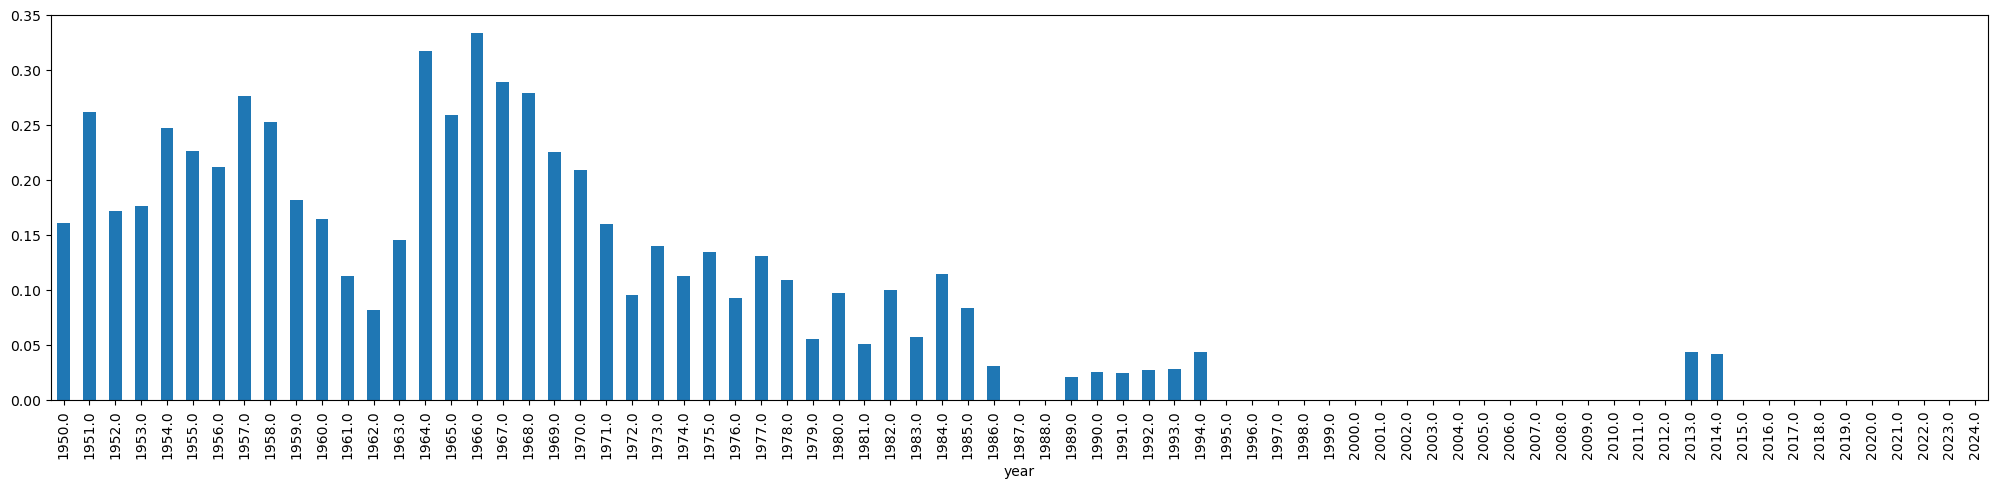

In [140]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [141]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                 year  
Monaco Grand Prix  1966.0    0.562500
                   1968.0    0.555556
French Grand Prix  1957.0    0.533333
                   1967.0    0.533333
Dutch Grand Prix   1966.0    0.529412
Name: name, dtype: float64

In [142]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                    year  
French Grand Prix     1957.0    0.533333
Argentine Grand Prix  1957.0    0.500000
                      1958.0    0.500000
Monaco Grand Prix     1967.0    0.473684
Dutch Grand Prix      1967.0    0.470588
Name: name, dtype: float64

In [143]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                    year  
Belgian Grand Prix    1967.0    0.222222
Dutch Grand Prix      1958.0    0.222222
Belgian Grand Prix    1958.0    0.210526
Argentine Grand Prix  1958.0    0.200000
French Grand Prix     1967.0    0.200000
Name: name, dtype: float64

<Axes: xlabel='year'>

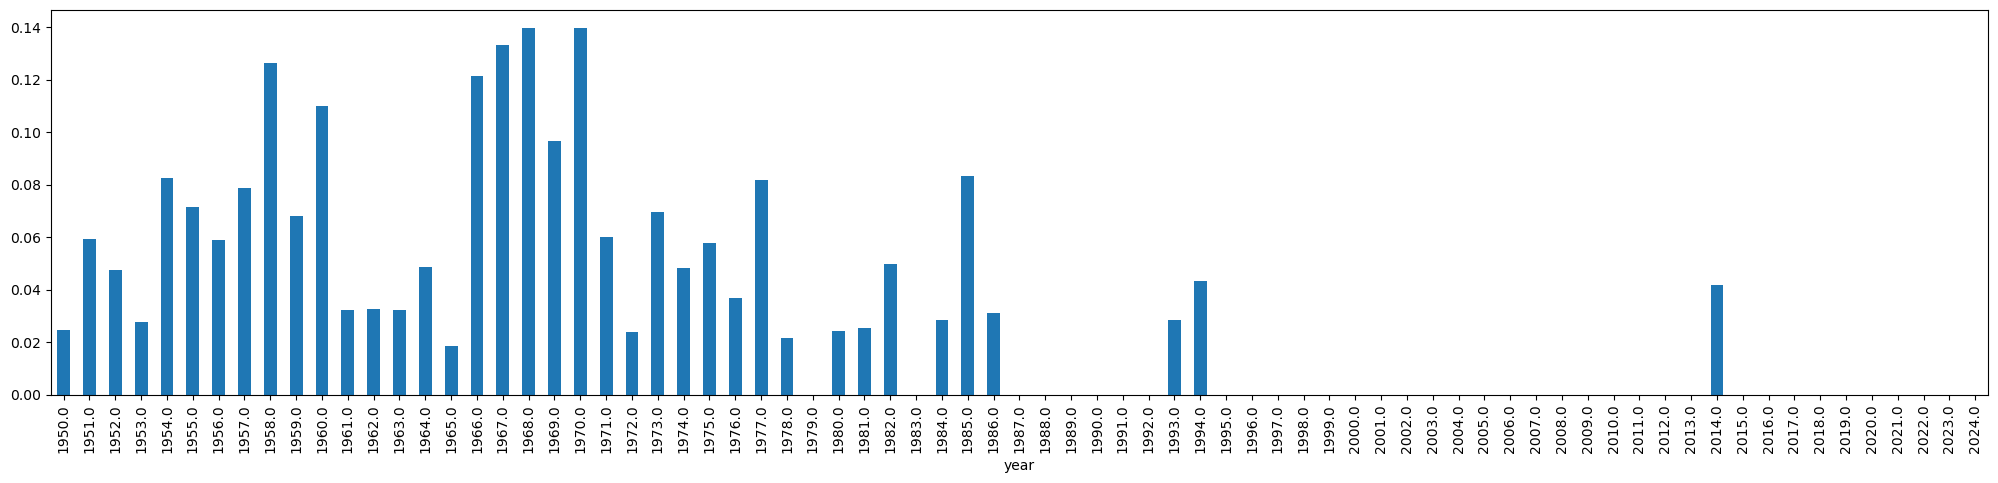

In [144]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [145]:
pd.Series(results[results['full_name'].isin(living)].groupby(['gp','year'])['full_name'].nunique() / results[results['full_name'].isin(dead)].groupby(['gp','year'])['full_name'].nunique()).sort_values().head(20)

gp                   year  
German Grand Prix    1953.0    0.030303
British Grand Prix   1961.0    0.033333
German Grand Prix    1962.0    0.033333
                     1963.0    0.035714
British Grand Prix   1956.0    0.037037
Belgian Grand Prix   1962.0    0.040000
British Grand Prix   1963.0    0.040000
Italian Grand Prix   1956.0    0.040000
British Grand Prix   1955.0    0.040000
Belgian Grand Prix   1961.0    0.040000
German Grand Prix    1958.0    0.040000
Mexican Grand Prix   1963.0    0.041667
Moroccan Grand Prix  1958.0    0.041667
Monaco Grand Prix    1963.0    0.041667
British Grand Prix   1964.0    0.041667
                     1962.0    0.041667
                     1960.0    0.041667
French Grand Prix    1963.0    0.043478
Monaco Grand Prix    1962.0    0.043478
Belgian Grand Prix   1963.0    0.043478
Name: full_name, dtype: float64

In [146]:
results[results['full_name'].isin(living)].groupby('full_name')['date'].min().sort_values().head(20)

full_name
Hans Herrmann            1953-08-02
Hermano da Silva Ramos   1955-06-19
André Milhoux            1956-08-05
Bruce Kessler            1958-05-18
Bernie Ecclestone        1958-05-18
A. J. Foyt               1958-05-30
Paul Goldsmith           1958-05-30
Peter Ashdown            1959-07-18
David Piper              1959-07-18
Fred Gamble              1960-09-04
Jim Hall                 1960-11-20
Michael May              1961-05-14
Jackie Lewis             1961-06-18
Gaetano Starrabba        1961-09-10
Roger Penske             1961-10-08
Paddy Driver             1963-12-28
Brausch Niemann          1963-12-28
Richard Attwood          1964-07-11
Jackie Stewart           1965-01-01
Clive Puzey              1965-01-01
Name: date, dtype: datetime64[ns]

In [147]:
results[results['full_name'].isin(living) & (results['year'] == 1961.0)]['full_name'].drop_duplicates()

10002         Roger Penske
10485             Jim Hall
10653         Jackie Lewis
12703    Gaetano Starrabba
18184          Michael May
21609        Hans Herrmann
Name: full_name, dtype: object

<Axes: xlabel='year'>

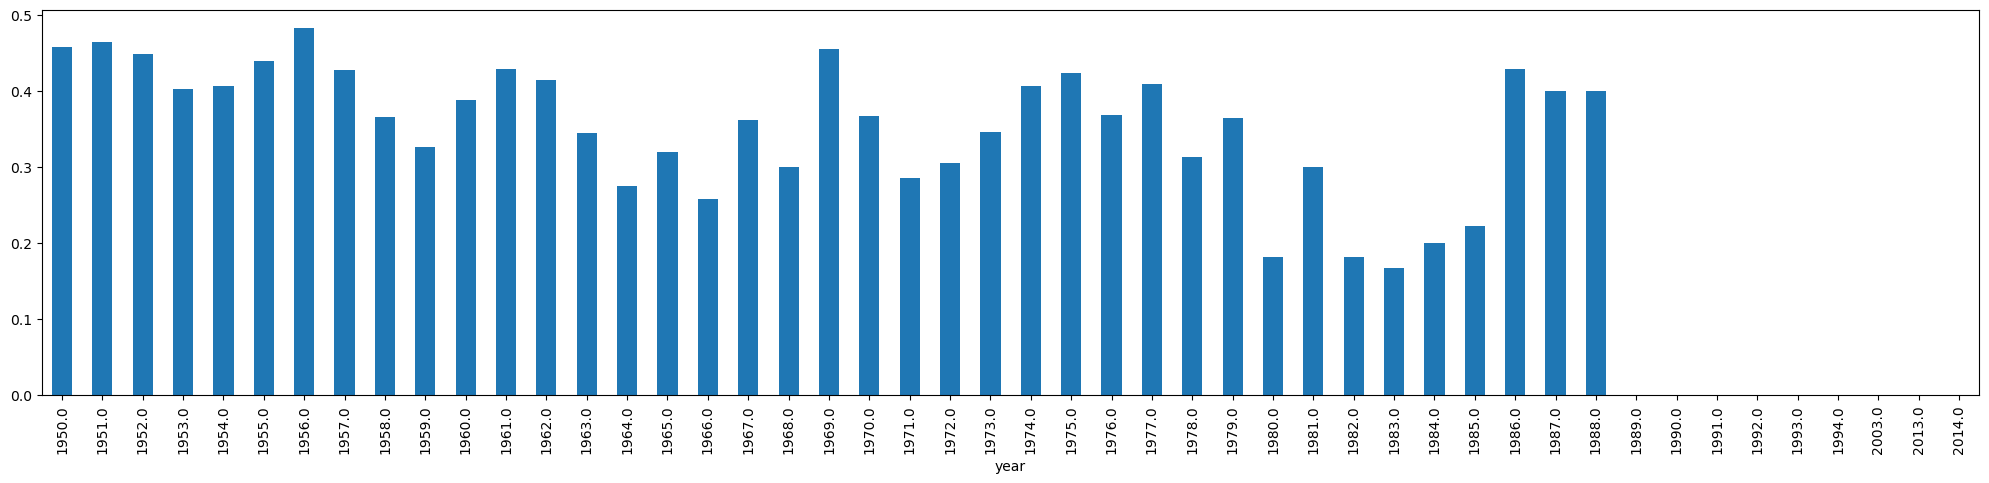

In [158]:
pd.Series(results[results['cause_of_death_mistral'] == 'natural'].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

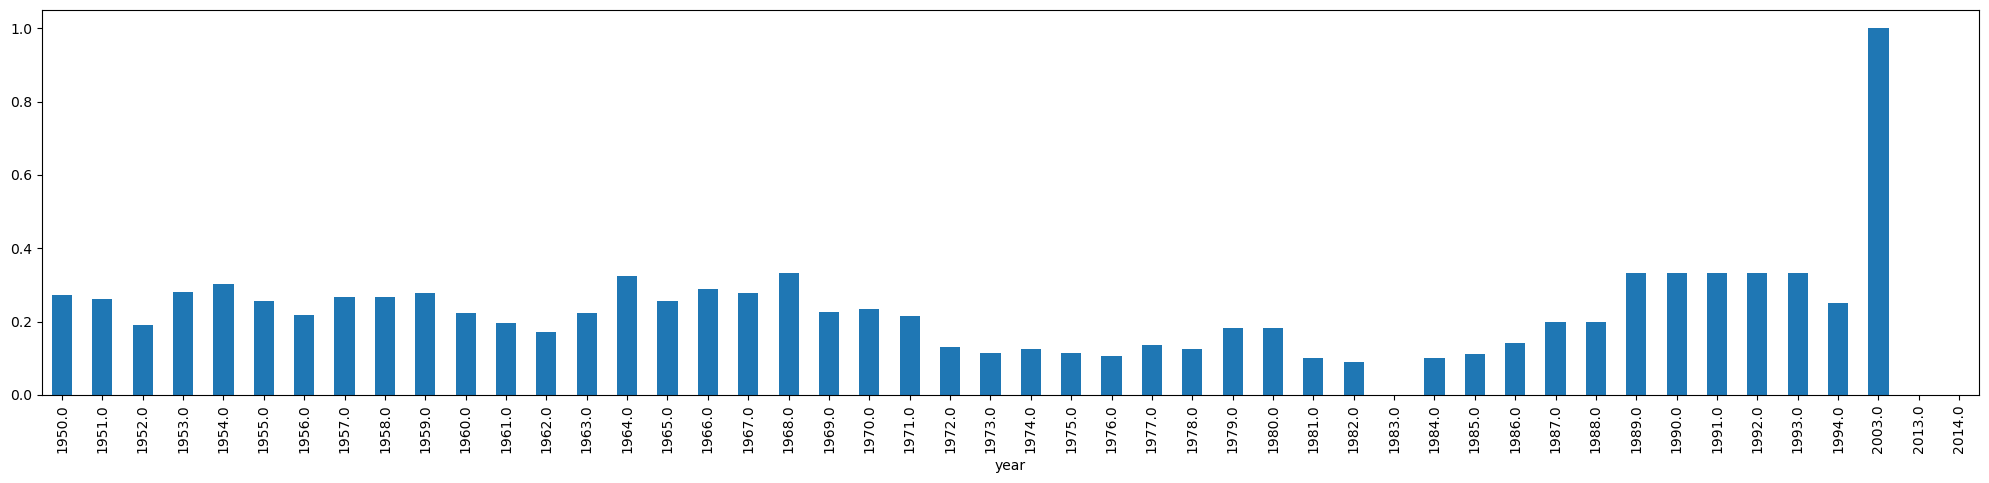

In [159]:
pd.Series(results[results['cause_of_death_mistral'].isin(['gp','otherf1','otherracing'])].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

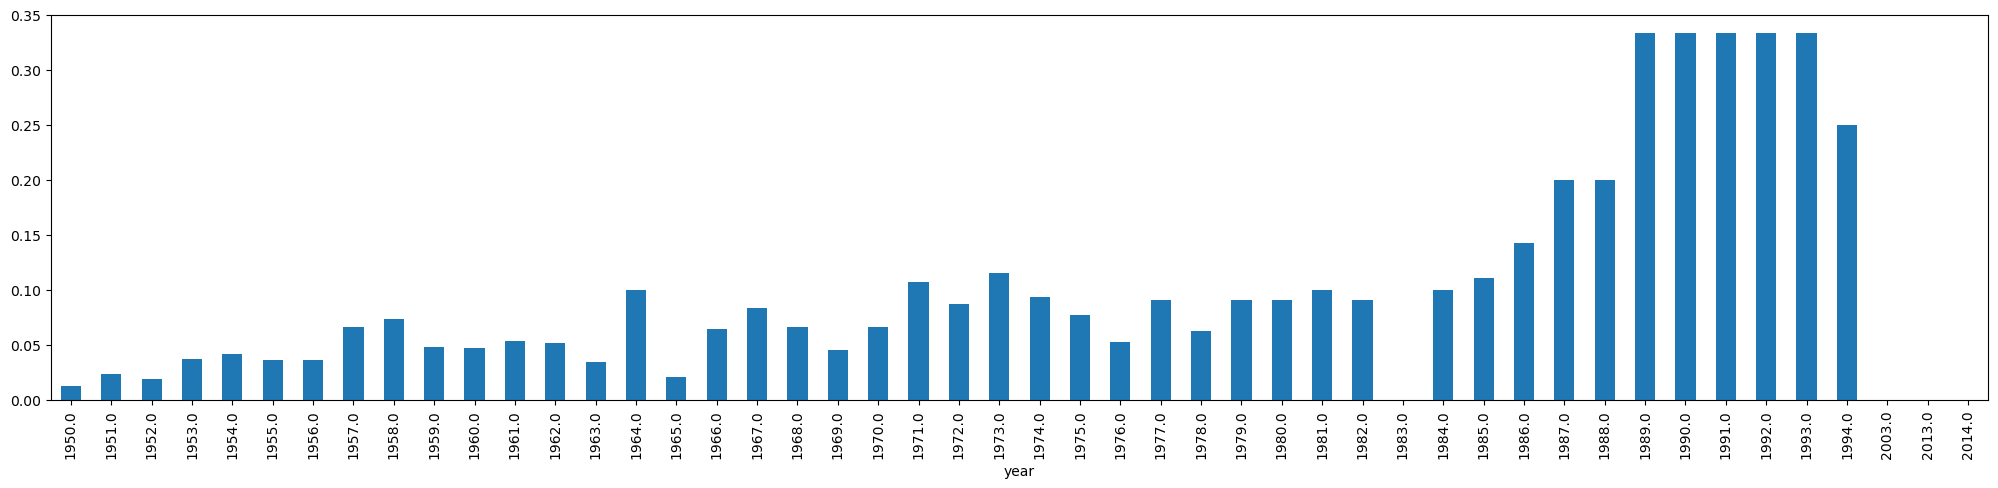

In [161]:
pd.Series(results[results['cause_of_death_mistral'] == 'gp'].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

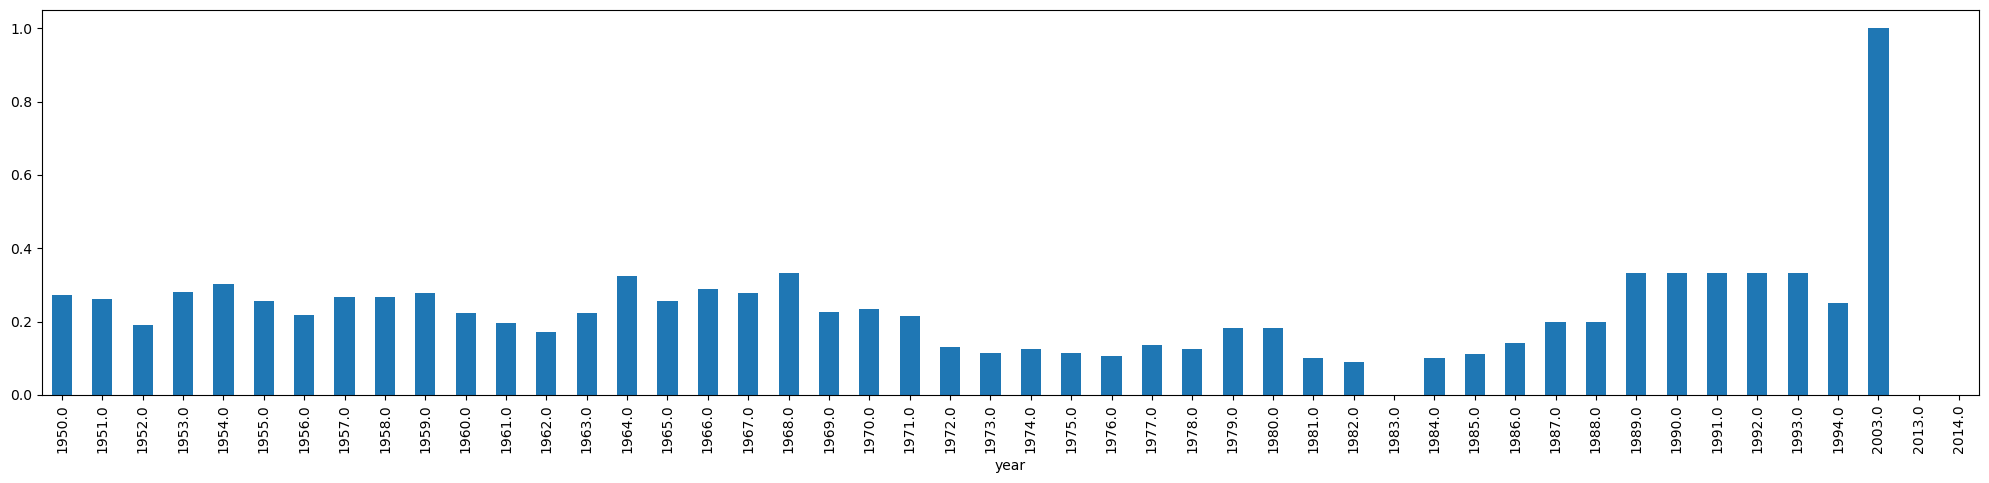

In [160]:
pd.Series(results[results['cause_of_death_mistral'].isin(['gp','otherf1','otherracing'])].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [151]:
import datetime

In [152]:
today = datetime.date.today()
today

datetime.date(2024, 3, 20)

In [153]:
def total_age(dod, dob):
    if dob:
        if str(dod) != "NaT":
            return dod - dob
        else:
            return pd.to_datetime(today) - dob
    else:
        return None

In [154]:
results['lived_until'] = results.apply(lambda row: total_age(row['date_of_death'], row['date_of_birth']), axis = 1)

In [155]:
results[['full_name','date_of_birth','date_of_death','lived_until']].drop_duplicates().sort_values(by='lived_until')

,full_name,date_of_birth,date_of_death,lived_until
1371,Oliver Bearman,2005-05-08,NaT,6891 days
8934,Ricardo Rodríguez de la Vega,1942-02-14,1962-11-01,7565 days
12685,Peter Ryan,1940-06-10,1962-07-02,8057 days
21358,Liam Lawson,2002-02-11,NaT,8073 days
9874,Chris Bristow,1937-12-02,1960-06-19,8235 days
...,...,...,...,...
9891,Leslie Marr,1922-08-14,2021-05-04,36058 days
21451,Paul Pietsch,1911-06-20,2012-05-31,36871 days
10405,Kenneth McAlpine,1920-09-21,2023-04-08,37454 days
17305,Clemar Bucci,NaT,2011-01-12,NaT


<Axes: xlabel='year'>

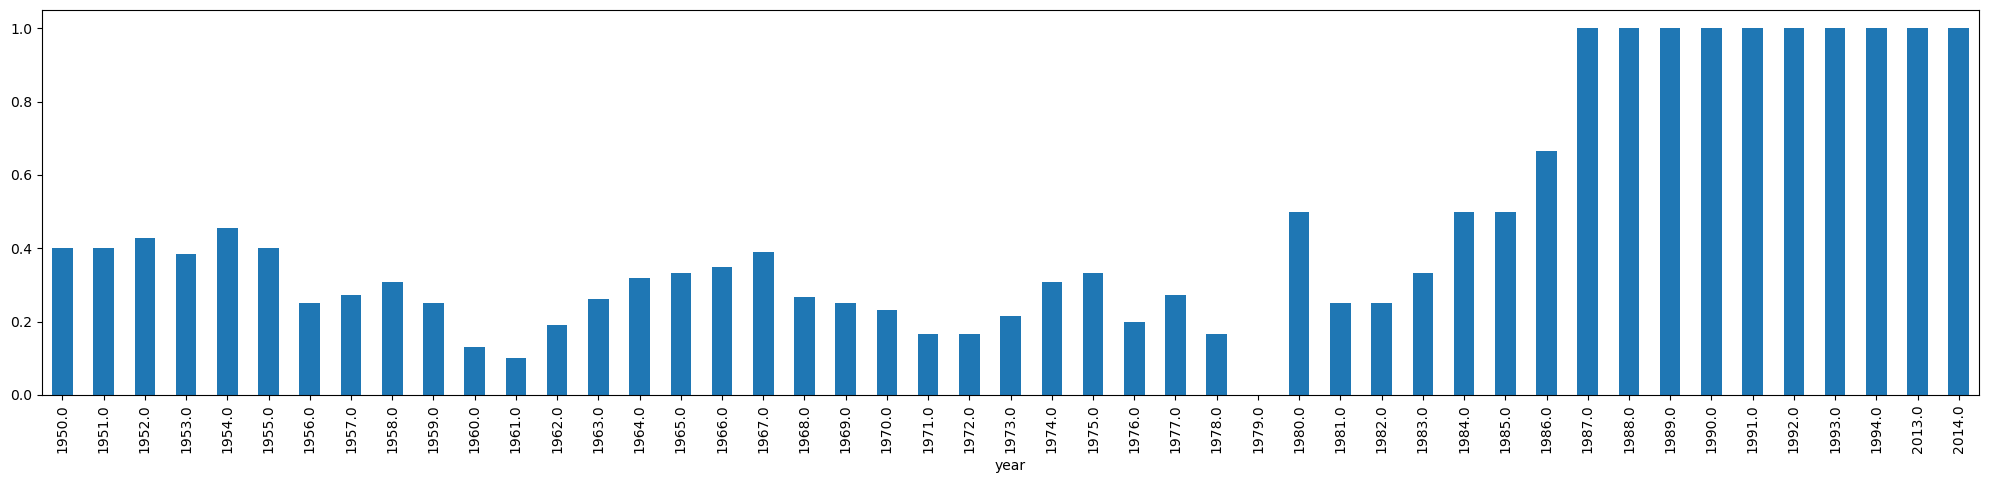

In [156]:
pd.Series(results[(results['manner_of_death'].isin(sad))].groupby('year')['name'].nunique() / results[~(results['manner_of_death'].isnull())].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

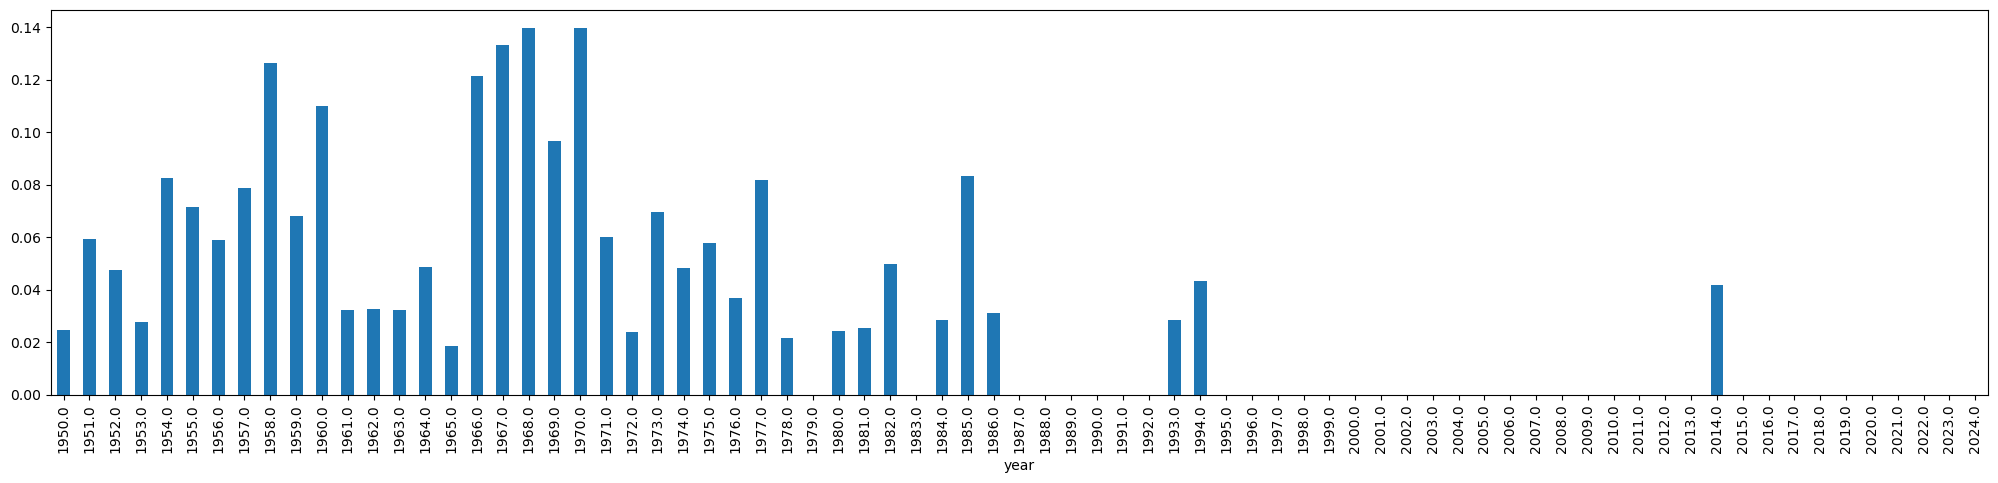

In [157]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))